### A01
C-Inverso  
**Isabela Torres-Septien Uribe**  
730667

**Instrucciones**  
Revisa el notebook adjunto.

Explica con detalle cada paso que se realiza en cada celda.

Usa referencias para justificar tus interpretaciones.

Repite el procedimiento con el dataset de dígitos usando SVC con sklearn.

In [ ]:
#importamos las paqueterias fetch_lfw_people de sklearn
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) #Cargamos el dataset que es de caras
print(faces.target_names) # Imprimimos los nombres o etiquetas de las personas del data set
print(faces.images.shape) #Imprimimos la forma de las imagenes el size que usaremos posteriormente

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


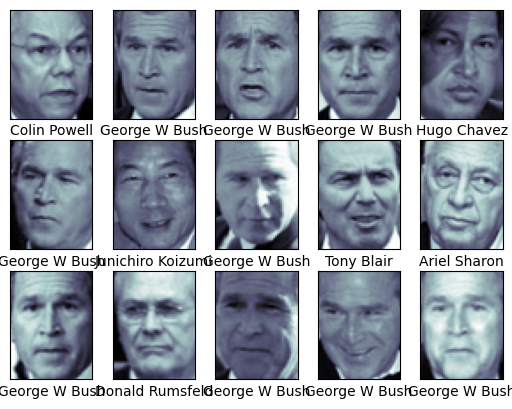

In [ ]:
#Importamos la pqueteria de matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#definimos la forma
fig, ax = plt.subplots(3, 5)

#Creamos un loop para mostrar las imagenes con las mismas caracteristicas y etiquetas, se organiza e un cmap
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
#Importamos las paqueterias de sklearn
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

#Vamos a definir las variables pca y svc, para despues usarlas en un pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)# PCA, escalamos los datos con varianza unitaria
svc = SVC(kernel='rbf', class_weight='balanced') # Clasifica con RBF, Ya lo habíamos usado anteriormente
model = make_pipeline(pca, svc) # aplicamos primero pca sobre los datos y luego svc

In [ ]:
model # Nuestro modelo

,steps,"[('pca', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,150
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


In [ ]:
#Importamos la paqueteria
from sklearn.model_selection import train_test_split

#Train test split nos ayudara a dividir el dataset en prueba y entrenamiento
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:

from sklearn.model_selection import GridSearchCV
#Grid seach es una paquetería que no habíamos visto pero nos va a ayudar a encontrar los hiperparametros

#Aqui le damos los parametros que vamos a usar y nos ayuda a mejorar nuestro rendimiento
param_grid = {'svc__C': [1, 5, 10, 50], # Parametros 
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} # Valores dados
grid = GridSearchCV(model, param_grid) # definimos grid, que hacemos una cross validation con los modelos y los parametros 

%time grid.fit(Xtrain, ytrain) # Entrenamos el modelo
print(grid.best_params_)#imprimimos el mejor parametro 

CPU times: total: 2min 45s
Wall time: 42.9 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
#creamos un modelo que estime basandonos en el mejor parametro grip
model = grid.best_estimator_ #Usamos el estimador de este modelo
yfit = model.predict(Xtest) # Predecimos este modelo

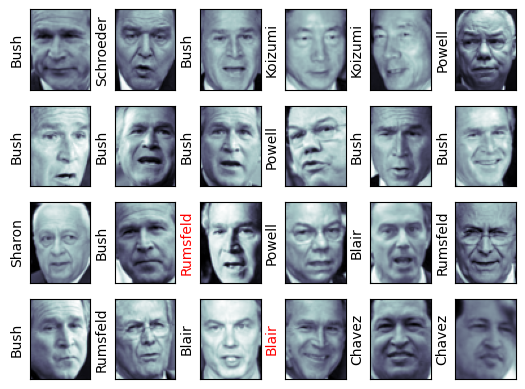

In [ ]:
#Creamos una figura con las imagenes y nuestra prediccion
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat): # Aqui en el loop de las imagenes primero las cambiamos de forma con as.flat
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone') #Con nuestros test le reshaepeamos y hacemos un cmap
    axi.set(xticks=[], yticks=[])#Quitamos ticks o ejes
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], #le ponemos solo la ultima palabra osease el apellido
                   color='black' if yfit[i] == ytest[i] else 'red')# Aqui decimos que cuando la prediccion esta bien ponga la ultima palabra en negro y cuando no en rojo

In [ ]:
#Importamos paqueteria classification_report
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
#Imprimimos los datos en un modo reporte/ resumen de los resultados pero usando nuestro y_test

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [10]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

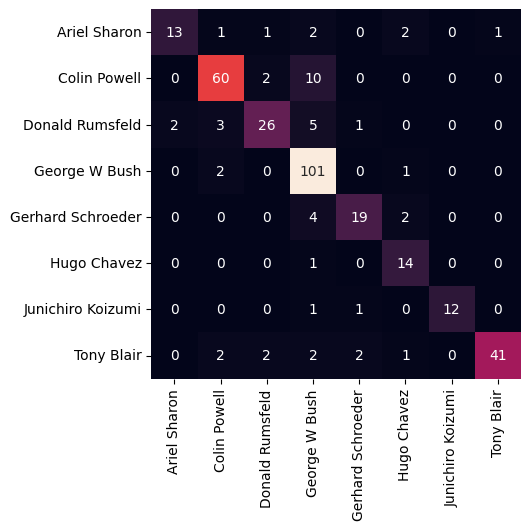

In [ ]:
#Importamos la paqueterias
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit) #Devuelve una matriz con los resultados de las predicciones 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,# nombres del eje x
            yticklabels=faces.target_names)#Nombres del eje y

Anteriormente, estuvimos explicando linea por linea en nuestro código todo lo que haciamos definiendo funciones y demás, desglozamos el comportamiento y aunque varios de estos comandos ya los habíamos usado y estabamos familiarizados con ellos al momento de explicarlo más al fonde aprendimos nuevos detalles, Junto a esto, hubo varias funciones que no sabíamos por ejemplo gridsearhCV, y randomized PCA. Por lo tanto, a estas funciones las investigamos del libro ISLP, cuando no lo encontramos recurimos a chat o a preguntar a mis compañeros con funciones menores.

In [34]:
#Repetimos el procedimiento con una nueva librería 
from sklearn import datasets
Digits = datasets.load_digits()
print(Digits.target_names)
print(Digits.images.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797, 8, 8)


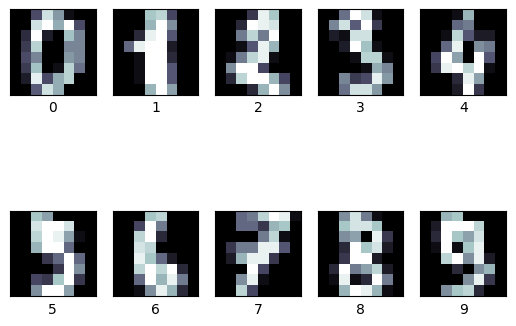

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=Digits.target_names[Digits.target[i]])

In [49]:
pca = RandomizedPCA(n_components=64, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [50]:
model

,steps,"[('pca', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,64
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Digits.data, Digits.target, random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 0.0001}


In [53]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

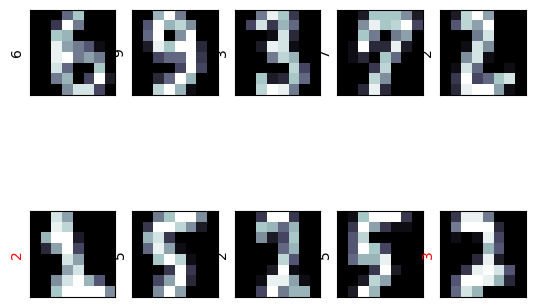

In [57]:
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8,8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(Digits.target_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.89      0.89      0.89        37
           2       0.80      0.87      0.84        38
           3       0.79      0.89      0.84        46
           4       0.94      0.85      0.90        55
           5       0.94      1.00      0.97        59
           6       1.00      0.98      0.99        45
           7       0.90      0.90      0.90        41
           8       0.79      0.82      0.81        38
           9       0.91      0.83      0.87        48

    accuracy                           0.90       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.90      0.90      0.90       450



<Axes: >

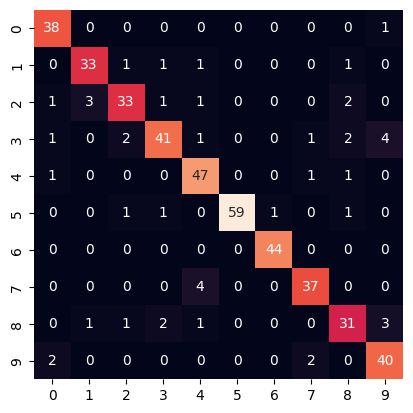

In [59]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= Digits['target_names'],
            yticklabels=Digits['target_names'])

En el apartado anterior replicamos nuestro codigo es super similar al anterior tuve un ligero problema al principio al no cambiar el tamaño de mi gráfica y no poner correctamente los target names para que lo muestre en la gráfica. Pero todo salio correctamente al final